Valores nulos por columna:
Transaction_ID             0
Fecha_Compra               0
Producto                   0
Categoría                  0
Precio_Unitario            0
Cantidad_Vendida           0
Total_Venta                0
Método_Pago                0
Ciudad_Cliente             0
País_Cliente               0
Descuento_Aplicado         0
Costo_Envio                0
Tiempo_Entrega_Estimado    0
Tiempo_Entrega_Real        0
Satisfacción_Cliente       0
Tipo_Cliente               0
Valoración_Producto        0
Frecuencia_Compra          0
Rentabilidad               0
dtype: int64


C:\Users\Alejo Maros\AppData\Local\Temp\ipykernel_13248\2069915637.py:54: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Descuento_Aplicado', y='Rentabilidad', size='Cantidad_Vendida', hue='Cantidad_Vendida', alpha=0.7, data=df, palette=color_palette, edgecolor='black')


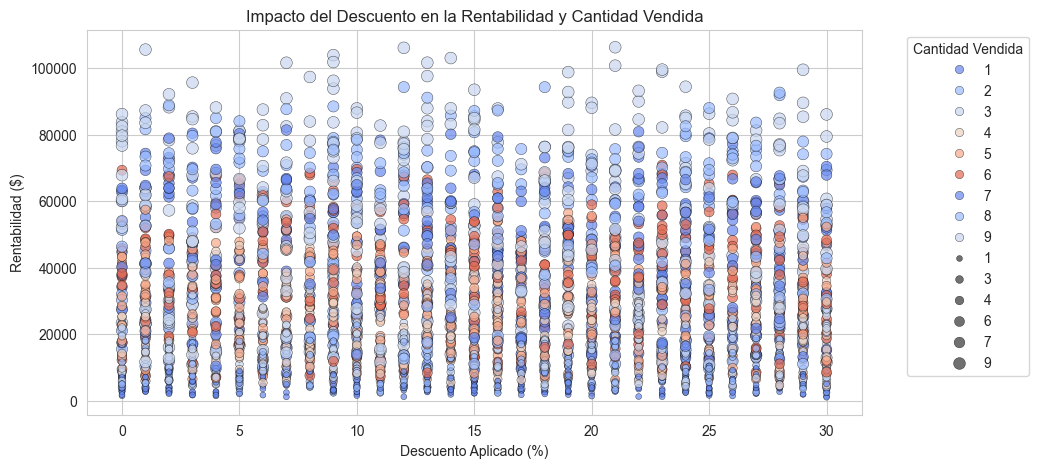

C:\Users\Alejo Maros\AppData\Local\Temp\ipykernel_13248\2069915637.py:63: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.histplot(data=df, x='Tiempo_Entrega_Real', hue='Satisfacción_Cliente', bins=15, kde=True, palette=color_palette, alpha=0.6)
C:\Users\Alejo Maros\AppData\Local\Temp\ipykernel_13248\2069915637.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Satisfacción del Cliente')


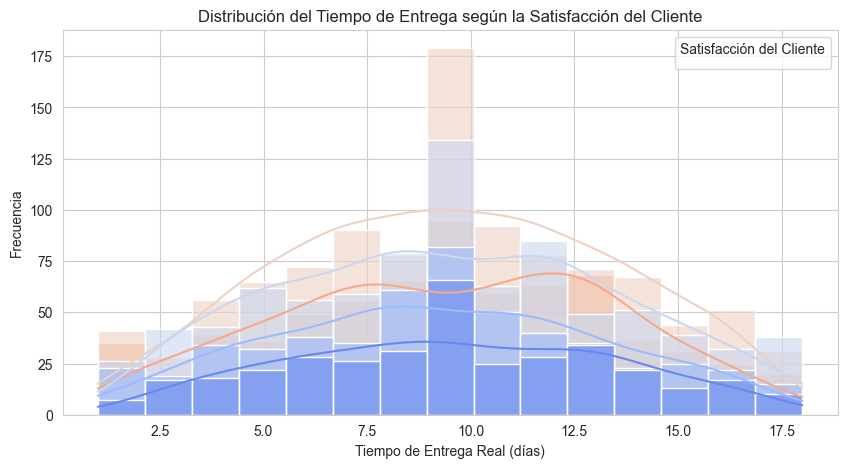

C:\Users\Alejo Maros\AppData\Local\Temp\ipykernel_13248\2069915637.py:72: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(x='Método_Pago', y='Total_Venta', hue='Frecuencia_Compra', data=df, palette=color_palette)


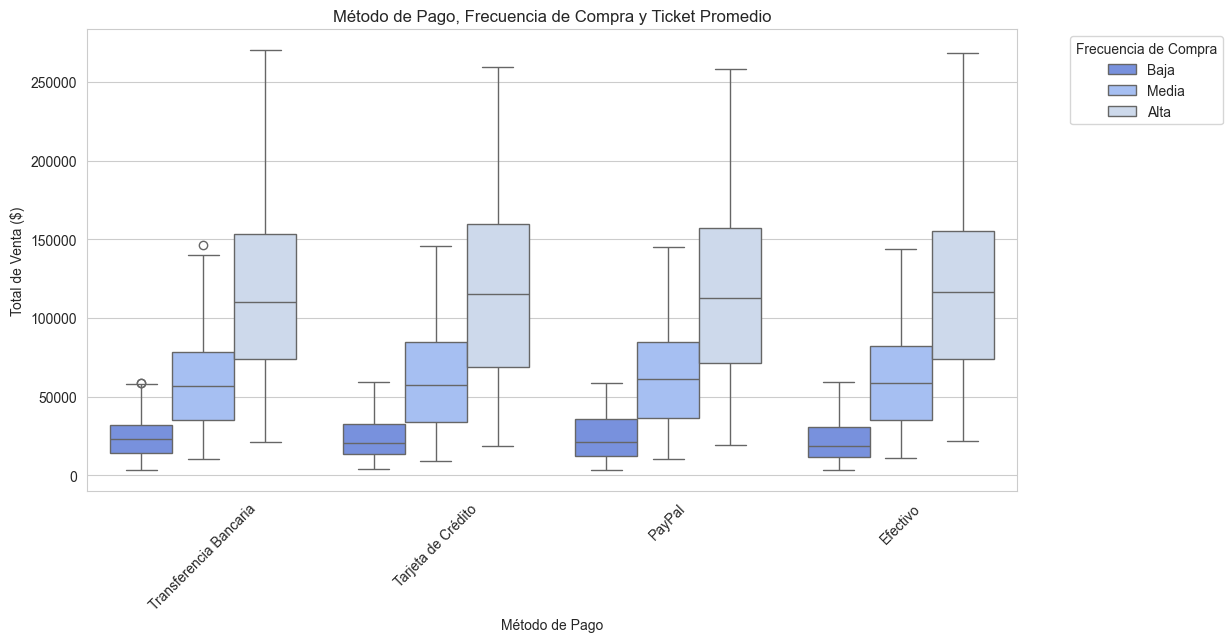

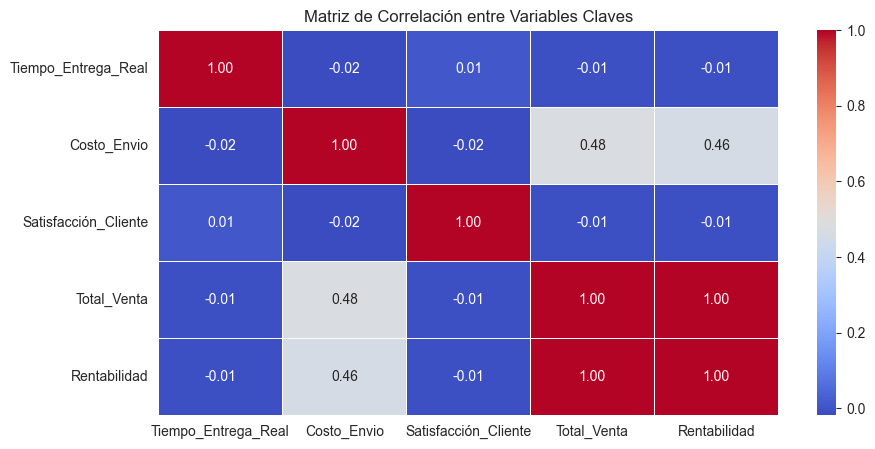

Variables seleccionadas: ['Precio_Unitario', 'Cantidad_Vendida', 'Total_Venta', 'Costo_Envio', 'Categoría_Accesorios', 'Categoría_Computación', 'Categoría_Electrónica', 'Frecuencia_Compra_Alta', 'Frecuencia_Compra_Baja', 'Frecuencia_Compra_Media']
MAE: 126.77
RMSE: 206.41
R²: 0.9999


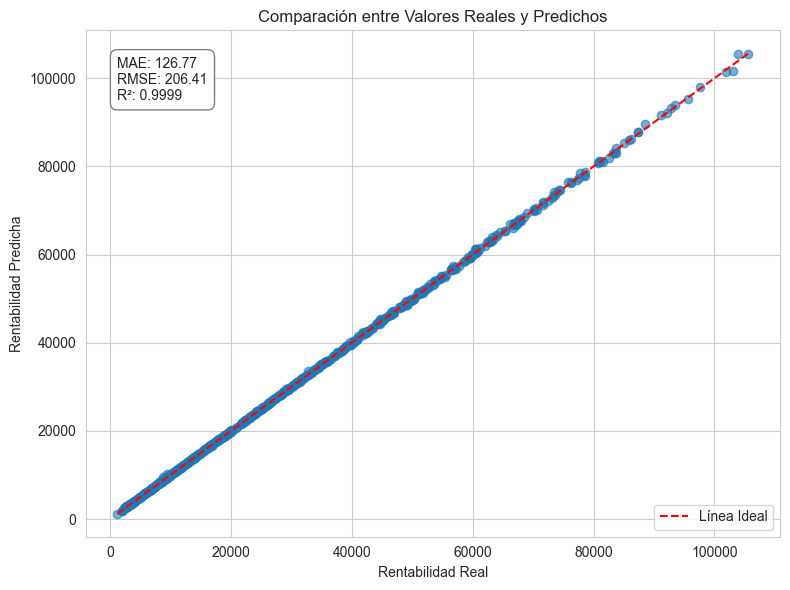

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Cargar el dataset
url = "https://raw.githubusercontent.com/AlejoMaros/DataScience/refs/heads/main/Dataset_Ventas.csv"
df = pd.read_csv(url)

### 1. ABSTRACT ###
"""
Este proyecto analiza un dataset de ventas para comprender patrones de compra, comportamientos de clientes y eficiencia en la entrega.
Se investigan relaciones entre el tipo de producto, métodos de pago, descuentos aplicados y satisfacción del cliente.
Se emplean técnicas de análisis exploratorio de datos (EDA) y visualización para detectar tendencias, correlaciones y anomalías en los datos.
Además, se evaluará el impacto de los costos de envío y la recurrencia de clientes sobre la rentabilidad y volumen de ventas.
"""

### 2. PREGUNTAS E HIPÓTESIS ###
# Preguntas
# - ¿Cómo afectan los descuentos a la cantidad de productos vendidos y a la rentabilidad de la empresa?
# - ¿Existe una correlación entre el tiempo de entrega, costos de envío y satisfacción del cliente?
# - ¿Qué métodos de pago son más utilizados y cómo afectan la frecuencia de compra?
# - ¿Hay diferencias significativas entre las categorías de productos en cuanto a precio, volumen de ventas y rentabilidad?
# - ¿La recurrencia del cliente afecta el ticket promedio de compra?

# Hipótesis
# - Un mayor descuento incrementa la cantidad vendida, pero reduce la rentabilidad.
# - Retrasos en la entrega y altos costos de envío disminuyen la satisfacción del cliente.
# - Los clientes que pagan con tarjeta de crédito tienen un ticket promedio mayor.
# - Los clientes recurrentes tienden a realizar compras de mayor valor en comparación con clientes nuevos.

### 3. IDENTIFICACIÓN DE VALORES PERDIDOS ###
print("Valores nulos por columna:")
print(df.isnull().sum())

### 4. VISUALIZACIONES ###

sns.set_style("whitegrid")
color_palette = sns.color_palette("coolwarm")

# Relación entre descuento, rentabilidad y cantidad vendida
plt.figure(figsize=(10,5))
sns.scatterplot(x='Descuento_Aplicado', y='Rentabilidad', size='Cantidad_Vendida', hue='Cantidad_Vendida', alpha=0.7, data=df, palette=color_palette, edgecolor='black')
plt.title('Impacto del Descuento en la Rentabilidad y Cantidad Vendida')
plt.xlabel('Descuento Aplicado (%)')
plt.ylabel('Rentabilidad ($)')
plt.legend(title='Cantidad Vendida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribución del Tiempo de Entrega según la Satisfacción del Cliente
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Tiempo_Entrega_Real', hue='Satisfacción_Cliente', bins=15, kde=True, palette=color_palette, alpha=0.6)
plt.title('Distribución del Tiempo de Entrega según la Satisfacción del Cliente')
plt.xlabel('Tiempo de Entrega Real (días)')
plt.ylabel('Frecuencia')
plt.legend(title='Satisfacción del Cliente')
plt.show()

# Método de pago, frecuencia de compra y ticket promedio
plt.figure(figsize=(12,6))
sns.boxplot(x='Método_Pago', y='Total_Venta', hue='Frecuencia_Compra', data=df, palette=color_palette)
plt.title('Método de Pago, Frecuencia de Compra y Ticket Promedio')
plt.xlabel('Método de Pago')
plt.ylabel('Total de Venta ($)')
plt.xticks(rotation=45)
plt.legend(title='Frecuencia de Compra', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(10,5))
corr = df[['Tiempo_Entrega_Real', 'Costo_Envio', 'Satisfacción_Cliente', 'Total_Venta', 'Rentabilidad']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Claves')
plt.show()

### 5. CONCLUSIONES ###
# - Se observó que los descuentos aumentan la cantidad vendida, pero pueden reducir la rentabilidad si no se manejan adecuadamente.
# - Los retrasos en la entrega afectan negativamente la satisfacción del cliente, especialmente en productos de alta demanda.
# - Los clientes que pagan con tarjeta de crédito suelen gastar más por transacción en comparación con otros métodos de pago.
# - Los clientes recurrentes tienen un ticket promedio más alto que los clientes nuevos, lo que sugiere que fidelizar clientes puede ser más rentable a largo plazo.
# - Los costos de envío elevados pueden afectar la satisfacción del cliente y reducir la rentabilidad si no se gestionan adecuadamente.
# - A través del análisis multivariado, se confirmó que la cantidad vendida varía con el descuento y que el costo de envío influye en la satisfacción del cliente.



## Parte III - Modelado Predictivo y Conclusiones
#1 Feature Selection
# Variable objetivo
y = df["Rentabilidad"]

# Eliminamos columnas poco útiles para el modelo
X = df.drop(columns=["Rentabilidad", "Transaction_ID", "Fecha_Compra"])

# Separar variables numéricas y categóricas
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocesamiento: imputación + codificación
preprocessor = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="median"), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# Pipeline con SelectKBest para quedarnos con las 10 mejores variables
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_regression, k=10))
])

# Aplicar pipeline
X_new = pipeline.fit_transform(X, y)

# Obtener nombres de las 10 features seleccionadas
ohe = pipeline.named_steps['preprocessing'].named_transformers_['cat']
encoded_cat_cols = ohe.get_feature_names_out(categorical_cols)
all_feature_names = numeric_cols + list(encoded_cat_cols)
selected_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)
selected_features = [all_feature_names[i] for i in selected_indices]

print("Variables seleccionadas:", selected_features)

#2 Entrenamiento del modelo

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Modelo: Árboles de regresión (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

#3 Métricas de evaluación

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5 
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


# Gráfico de dispersión validadno las evaluacion del modelo y conclusiones.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Línea Ideal")
plt.xlabel("Rentabilidad Real")
plt.ylabel("Rentabilidad Predicha")
plt.title("Comparación entre Valores Reales y Predichos")
plt.grid(True)
plt.text(x=y_test.min(), 
         y=y_test.max()*0.9, 
         s=f"MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.4f}",
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

plt.legend()
plt.tight_layout()
plt.show()


### CONCLUSIONES ###
# En este proyecto trabajamos con un dataset de ventas y aplicamos un modelo de regresión para predecir la **rentabilidad** de cada operación. Para simplificar el análisis,
# primero hicimos una selección de características usando `SelectKBest`, lo que nos permitió quedarnos con las variables más relevantes (como precio unitario, cantidad vendida, total de venta, entre otras).
# Luego entrenamos un modelo de árboles de regresión (Random Forest), que funcionó muy bien: obtuvo un R² de casi 1, lo que significa que explica prácticamente toda la variabilidad de los datos.
# Las métricas como el MAE y el RMSE también fueron bastante bajas, lo que refuerza la buena performance del modelo.
# Como cierre, podríamos decir que el modelo logra hacer muy buenas predicciones de rentabilidad a partir de las variables seleccionadas. Para seguir mejorando, se podrían probar otros algoritmos, ajustar hiperparámetros o evaluar con nuevos datos.


